In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(city_data, ride_data, on='city')


# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
avg_fare = merge_df.groupby('city')['fare'].mean()
rides_per_city = merge_df.groupby('city')['ride_id'].count()
drivers_per_city = merge_df.groupby('city')['driver_count'].first()
type_city = merge_df.groupby('city')['type'].first()
sum_fare_city = merge_df.groupby('city')['fare'].sum()


group_data = pd.DataFrame({"fare":avg_fare,
                               "rides":rides_per_city,
                               "drivers":drivers_per_city,
                               "type":type_city,
                               "total fare":sum_fare_city
                               })

group_data.head()

,fare,rides,drivers,type,total fare
city,,,,,
Amandaburgh,24.641667,18,12,Urban,443.55
Barajasview,25.332273,22,26,Urban,557.31
Barronchester,36.422500,16,11,Suburban,582.76
Bethanyland,32.956111,18,22,Suburban,593.21
Bradshawfurt,40.064000,10,7,Rural,400.64


## Bubble Plot of Ride Sharing Data

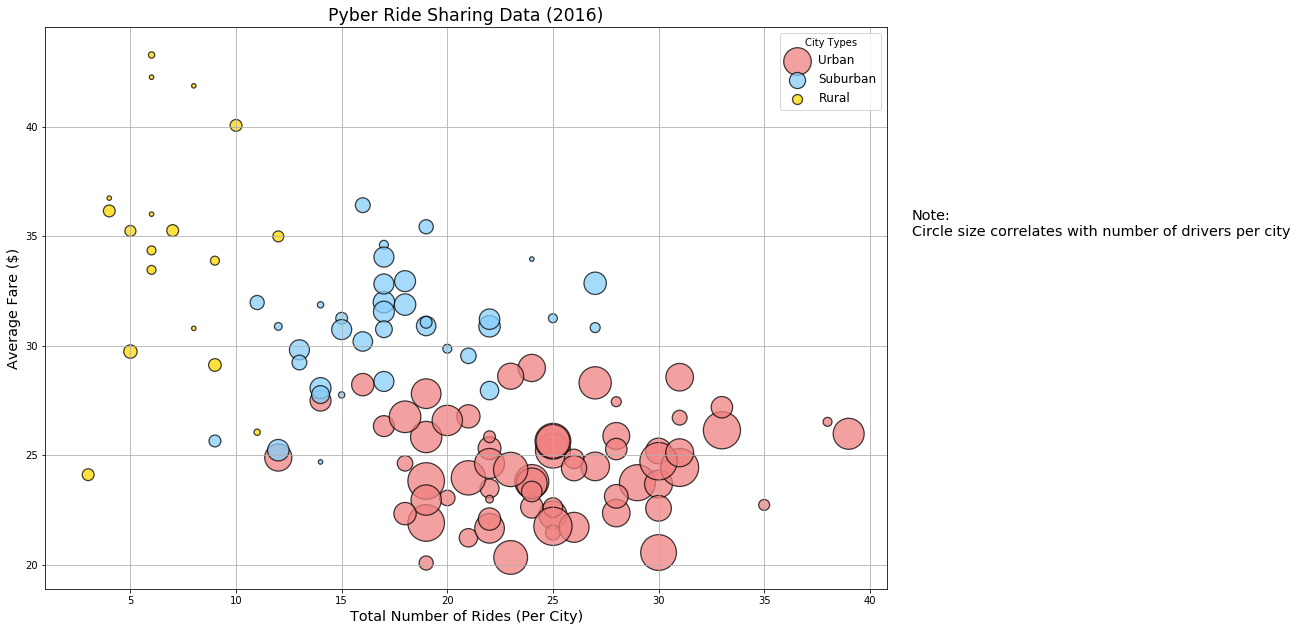

<Figure size 432x288 with 0 Axes>

In [8]:
# Obtain the x and y coordinates for each of the three city types
urban = group_data[group_data['type'] == "Urban"]
suburban = group_data[group_data['type'] == "Suburban"]
rural = group_data[group_data['type'] == "Rural"]
plt.axes([1.025,1.025,1.95,1.95])

# Build the scatter plots for each city types

plt.scatter(urban['rides'],urban["fare"], color = 'LightCoral', edgecolors = 'black', s = urban['drivers']*20,
            label = 'Urban', alpha = .75, linewidths=1.25)
plt.scatter(suburban['rides'],suburban["fare"], color = 'LightSkyBlue', edgecolors = 'black', s = suburban['drivers']*20,
           label = 'Suburban', alpha = .75, linewidths=1.25)
plt.scatter(rural['rides'],rural["fare"], color = 'Gold', edgecolors = 'black', s = rural['drivers']*20, 
             label = 'Rural', alpha = .75, linewidths=1.25)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)", fontsize = 'xx-large')
plt.ylabel("Average Fare ($)", fontsize = 'x-large')
plt.xlabel("Total Number of Rides (Per City)", fontsize = 'x-large')

# Create a legend

plt.legend(loc = 'upper right', fontsize = 'large', title="City Types",)

# Incorporate a text label regarding circle size

plt.text(42,35,"Note:\nCircle size correlates with number of drivers per city", fontsize = 'x-large')

# Save Figure

plt.grid()
plt.show()
plt.savefig('pyber.png')

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

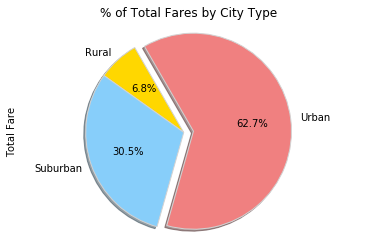

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Type Percents

type_sorted = group_data.groupby('type')

type_sorted_df = pd.DataFrame()

type_sorted_df['Total Rides'] = type_sorted["rides"].sum()
type_sorted_df['Total Drivers'] = type_sorted["drivers"].sum()
type_sorted_df['Total Fare'] = type_sorted["total fare"].sum()
type_sorted_df.reset_index(inplace=True)
type_sorted_df.head()

# Build Pie Chart
colors_1 = ['Gold','LightSkyBlue', 'LightCoral']
labels_1 = ['Rural', 'Suburban', 'Urban']
explode_1 = [0, 0, 0.1]


type_sorted_df.plot(kind="pie",y="Total Fare", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=explode_1,
                  colors=colors_1, labels=labels_1, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

#plt.axis('off')
plt.axis('equal')

plt.title('% of Total Fares by City Type')

# Save Figure

plt.show()
plt.savefig('pyber.png')


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

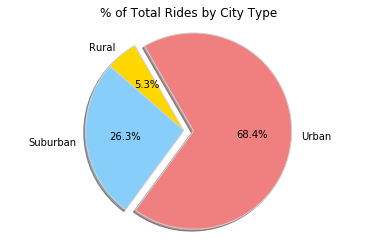

<Figure size 432x288 with 0 Axes>

In [10]:
# Calculate Ride Percents

# Build Pie Chart
type_sorted_df.plot(kind="pie",y="Total Rides", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=explode_1,
                  colors=colors_1, labels=labels_1, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Rides by City Type')

# Save Figure

plt.show()
plt.savefig('pyber.png')


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

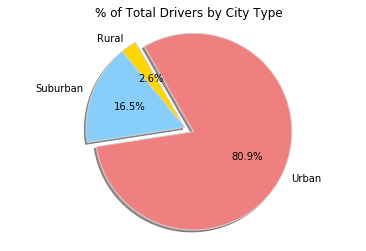

<Figure size 432x288 with 0 Axes>

In [12]:
# Calculate Driver Percents

# Build Pie Charts
type_sorted_df.plot(kind="pie",y="Total Drivers", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=explode_1,
                  colors=colors_1, labels=labels_1, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Drivers by City Type')

# Save Figure

plt.show()
plt.savefig('pyber.png')


In [ ]:
# Show Figure
plt.show()